## Phishing URL Detection :


## Problem Statement
The goal of this project is to build a machine learning model that can classify
whether a given website URL is phishing or legitimate (1 or -1) based on extracted features.


## Steps:
1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Model Building and Training
6. Comparision of Model
7. Conclusion

In [5]:
## Importing Required Libraries


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

## 1. Loading the Data


In [6]:
# loading data into dataframe
df = pd.read_csv("phishing.csv")
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## 2. Familiarizing with data and EDA


In [7]:
print(f'The shapes of the Dataframe is: {df.shape}')

The shapes of the Dataframe is: (11054, 32)


In [8]:
print(f'\nThe Summery Statistics of the dataset are:\n {df.describe().T}')


The Summery Statistics of the dataset are:
                        count         mean          std  min      25%     50%  \
Index                11054.0  5526.500000  3191.159272  0.0  2763.25  5526.5   
UsingIP              11054.0     0.313914     0.949495 -1.0    -1.00     1.0   
LongURL              11054.0    -0.633345     0.765973 -1.0    -1.00    -1.0   
ShortURL             11054.0     0.738737     0.674024 -1.0     1.00     1.0   
Symbol@              11054.0     0.700561     0.713625 -1.0     1.00     1.0   
Redirecting//        11054.0     0.741632     0.670837 -1.0     1.00     1.0   
PrefixSuffix-        11054.0    -0.734938     0.678165 -1.0    -1.00    -1.0   
SubDomains           11054.0     0.064049     0.817492 -1.0    -1.00     0.0   
HTTPS                11054.0     0.251040     0.911856 -1.0    -1.00     1.0   
DomainRegLen         11054.0    -0.336711     0.941651 -1.0    -1.00    -1.0   
Favicon              11054.0     0.628551     0.777804 -1.0     1.00     1.

In [9]:
# drop unnecessary features
df.drop(columns= 'Index', axis = 1, inplace=True)

In [10]:
print(f'Now the shape of the Dataframe is: {df.shape}')

Now the shape of the Dataframe is: (11054, 31)


In [11]:
#Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              11054 non-null  int64
 1   LongURL              11054 non-null  int64
 2   ShortURL             11054 non-null  int64
 3   Symbol@              11054 non-null  int64
 4   Redirecting//        11054 non-null  int64
 5   PrefixSuffix-        11054 non-null  int64
 6   SubDomains           11054 non-null  int64
 7   HTTPS                11054 non-null  int64
 8   DomainRegLen         11054 non-null  int64
 9   Favicon              11054 non-null  int64
 10  NonStdPort           11054 non-null  int64
 11  HTTPSDomainURL       11054 non-null  int64
 12  RequestURL           11054 non-null  int64
 13  AnchorURL            11054 non-null  int64
 14  LinksInScriptTags    11054 non-null  int64
 15  ServerFormHandler    11054 non-null  int64
 16  InfoEmail            1

In [12]:
# nunique value in columns

df.nunique()

,0
UsingIP,2
LongURL,3
ShortURL,2
Symbol@,2
Redirecting//,2
PrefixSuffix-,2
SubDomains,3
HTTPS,3
DomainRegLen,2
Favicon,2


In [44]:
for i in df.columns:
  print(f'The unique values in {i} are: {df[i].unique()}')

The unique values in UsingIP are: [ 1 -1]
The unique values in LongURL are: [ 1  0 -1]
The unique values in ShortURL are: [ 1 -1]
The unique values in Symbol@ are: [ 1 -1]
The unique values in Redirecting// are: [ 1 -1]
The unique values in PrefixSuffix- are: [-1  1]
The unique values in SubDomains are: [ 0 -1  1]
The unique values in HTTPS are: [ 1 -1  0]
The unique values in DomainRegLen are: [-1  1]
The unique values in NonStdPort are: [ 1 -1]
The unique values in HTTPSDomainURL are: [-1  1]
The unique values in RequestURL are: [ 1 -1]
The unique values in AnchorURL are: [ 0 -1  1]
The unique values in LinksInScriptTags are: [-1  0  1]
The unique values in ServerFormHandler are: [-1  1  0]
The unique values in InfoEmail are: [ 1 -1]
The unique values in AbnormalURL are: [ 1 -1]
The unique values in WebsiteForwarding are: [0 1]
The unique values in StatusBarCust are: [ 1 -1]
The unique values in DisableRightClick are: [ 1 -1]
The unique values in UsingPopupWindow are: [ 1 -1]
The uni

In [13]:
# Count of Phishing and legetimate
df['class'].value_counts()

,count
class,
1,6157
-1,4897


Observation:
 - There are 11054 instances and 31 features in our dataset.
 - Out of which 30 features are independent and 1 is dependent.
 - Data types of all the features are int datatype.
 - There is no null-values in dataset.

## 3. Visualizing the dataset
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

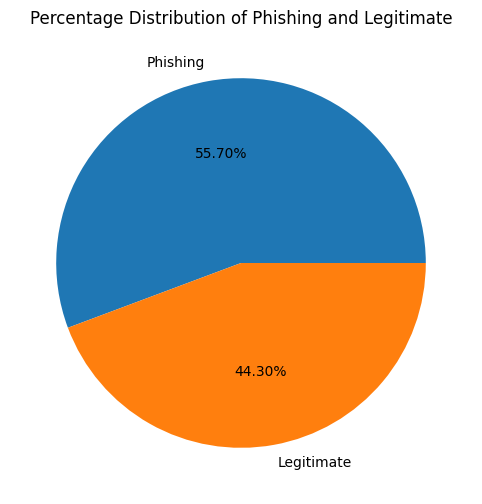

In [14]:
# Percentage distrubution of Phishing and legitimate in class
plt.figure(figsize=(10,6))
plt.pie(df['class'].value_counts(), labels=[ 'Phishing','Legitimate'], autopct='%1.2f%%')
plt.title('Percentage Distribution of Phishing and Legitimate')
plt.show()

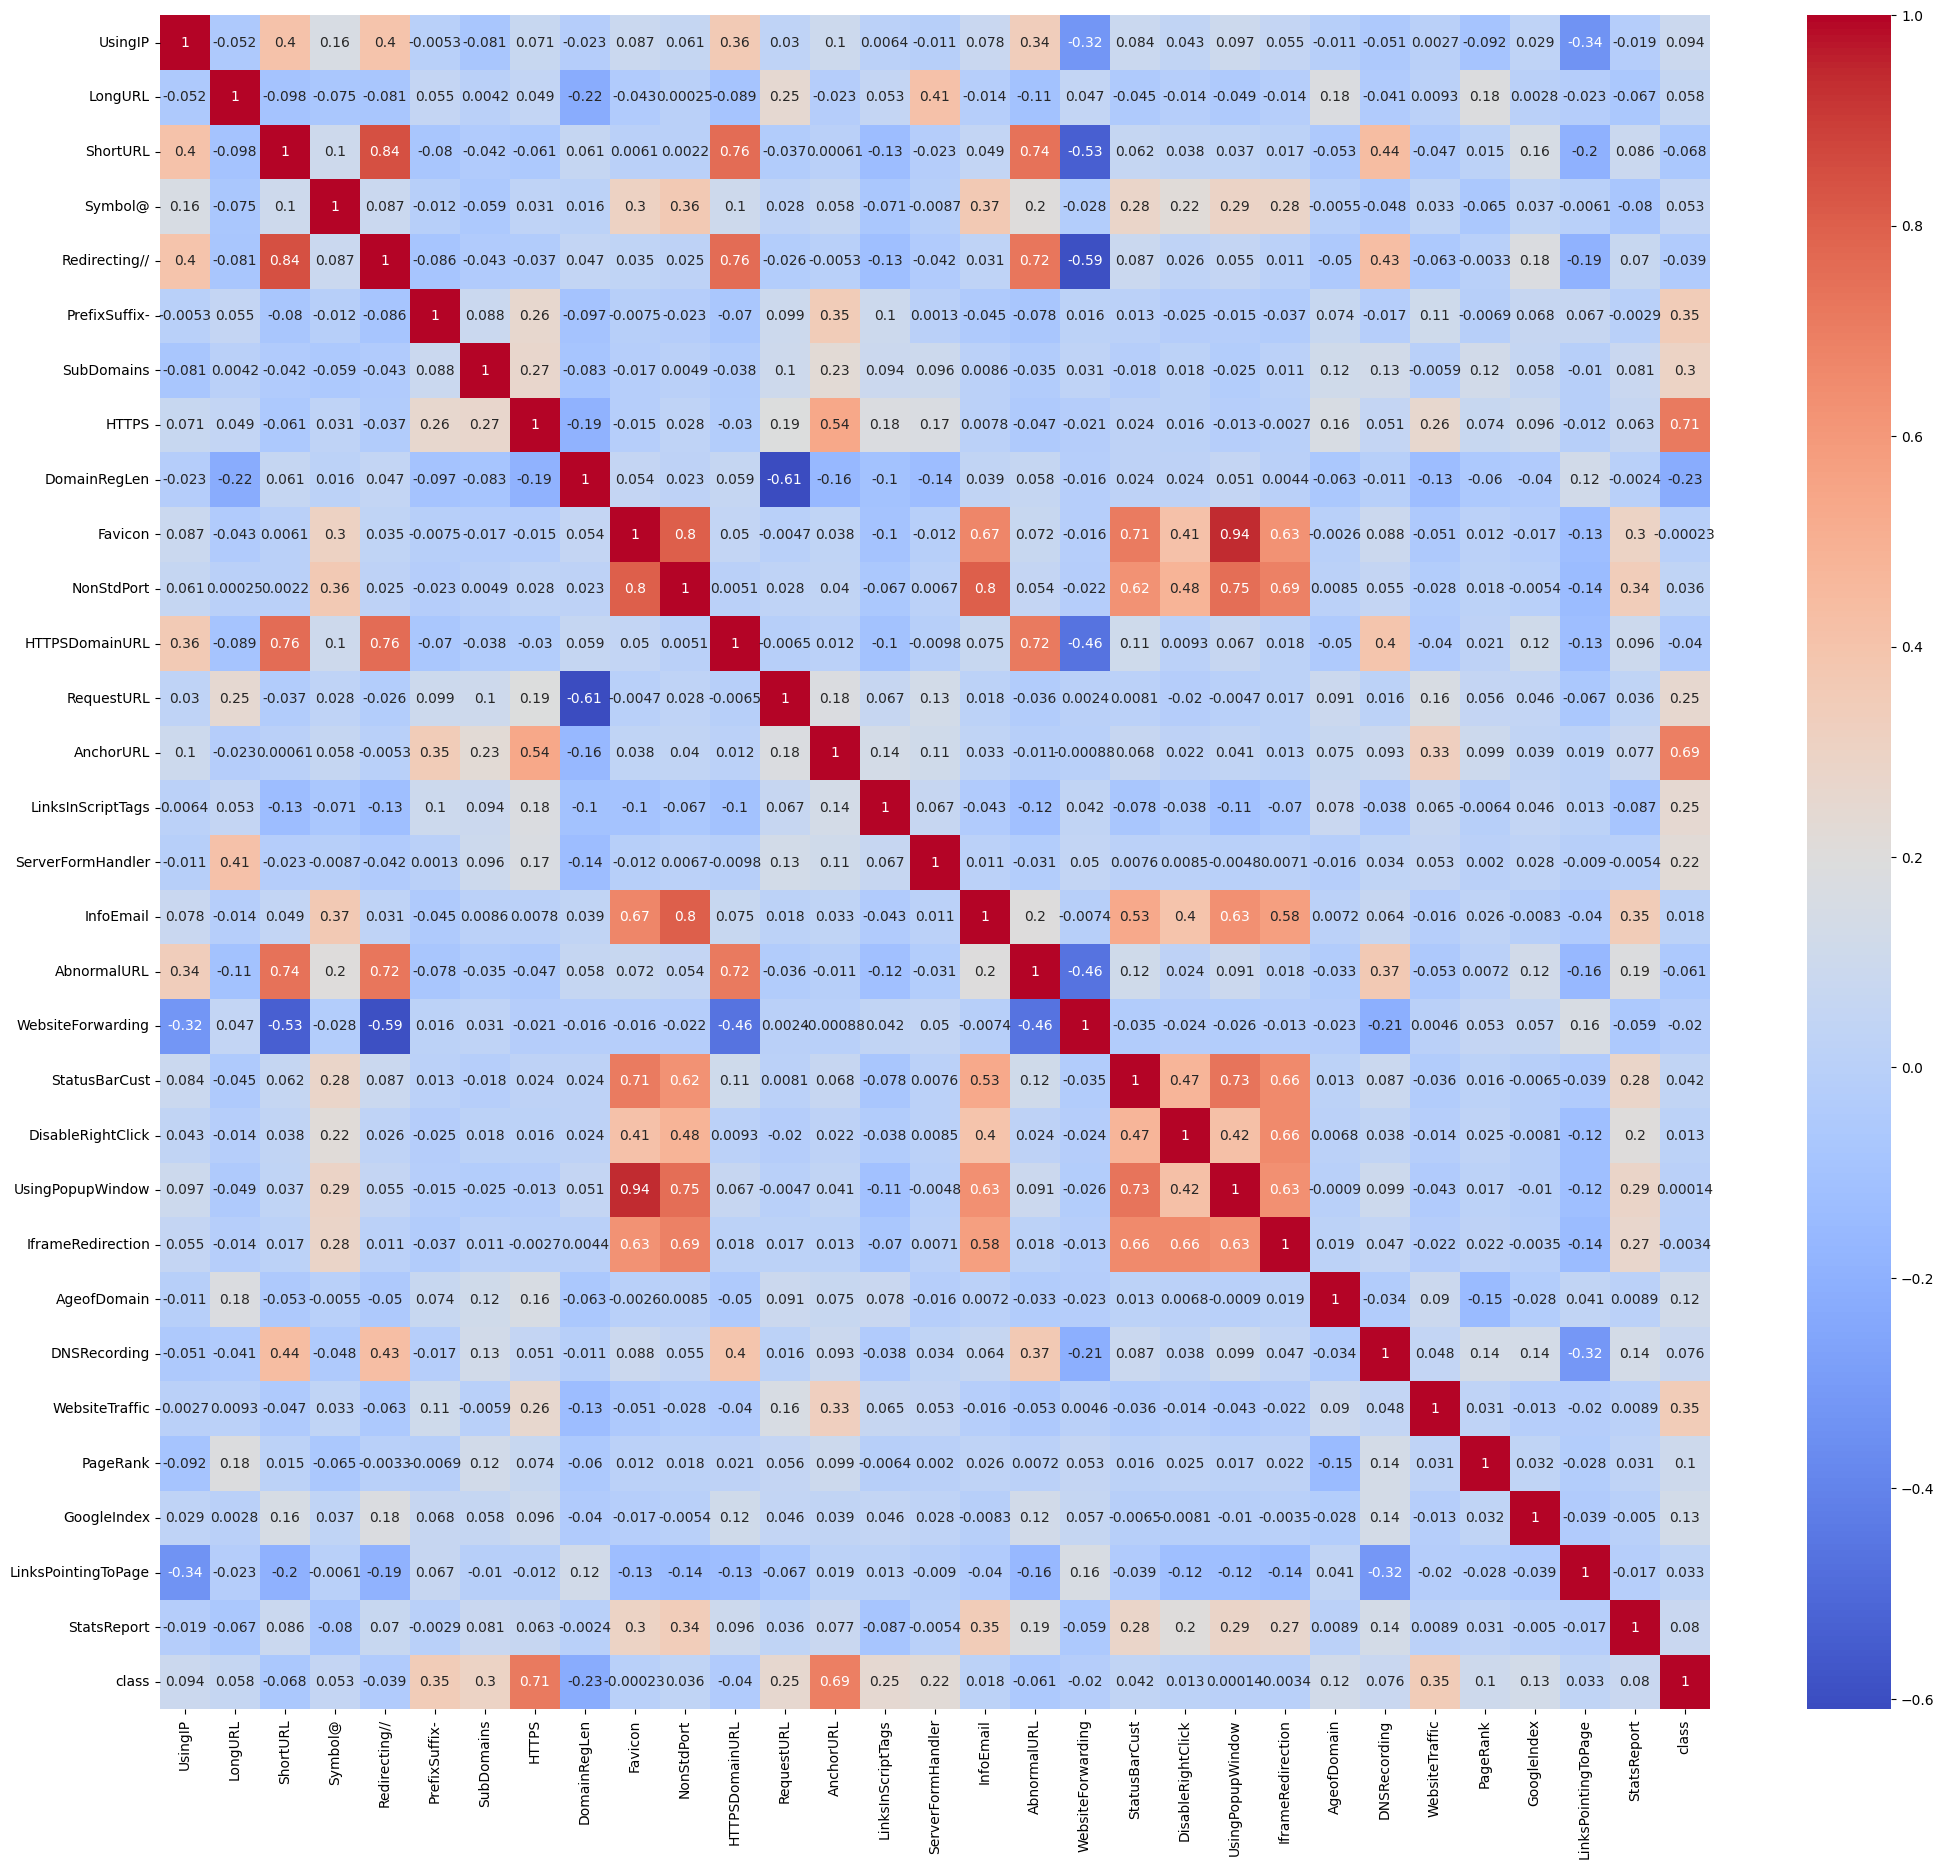

In [15]:
#Correlation heatmap
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [16]:
#  Identify Features Highly Correlated with Target (class)
corr_with_target = df.corr()['class'].sort_values(ascending=False)
corr_with_target

,class
class,1.000000
HTTPS,0.714704
AnchorURL,0.692895
PrefixSuffix-,0.348588
WebsiteTraffic,0.346003
SubDomains,0.298231
RequestURL,0.253478
LinksInScriptTags,0.248415
ServerFormHandler,0.221380
GoogleIndex,0.129000


Observation from Heatmap:
- Features like HTTPS, AnchorURL, PrefixSuffix- and AbnormalURL show strong correlation with the target, indicating their high predictive importance for phishing detection.
- There are some Features with high correlation between them, such as ShortURL - Redirecting//, Favicon - NonStdPort, Favicon - UsingPopupWindow,

In [17]:
# Remove extra Features
df.drop(columns=['Favicon'],axis = 1, inplace = True)

## 4. Splitting the Data

In [18]:
# Splitting the dataset into dependent and independent features.
X = df.drop('class', axis = 1)
y = df['class']

In [19]:
# Splitting the dataset for train and test , 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

print('Shapes are :')
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Shapes are :


((8843, 29), (2211, 29), (8843,), (2211,))

## 5. Model Building and Training

In this phase, multiple machine learning models were developed to classify phishing and legitimate URLs. Logistic Regression was used as a baseline model to understand linear decision boundaries and the impact of individual features. Random Forest Classifier was applied to capture non-linear relationships and feature interactions, while XGBoost Classifier was employed for its strong performance on tabular data and built-in regularization capabilities. The models were evaluated using accuracy, precision, recall, and F1-score. A comparative analysis of all models was performed to identify the most reliable and robust approach for phishing URL detection.

In [20]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## Logistis Regression Model:
Logistic Regression is a widely used supervised machine learning algorithm for binary classification problems. In the phishing URL detection project, it helps classify URLs as phishing or legitimate by modeling the probability of a URL belonging to a particular class. Despite its simplicity, Logistic Regression is highly effective, interpretable, and serves as a strong baseline model for evaluating more complex algorithms.

In [21]:
# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter = 500, n_jobs= -1, random_state= 42)

# train the model
log_reg.fit(X_train, y_train)

# prediction
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

In [22]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = accuracy_score(y_train,y_train_pred)
acc_test_log = accuracy_score(y_test,y_test_pred)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = f1_score(y_train,y_train_pred)
f1_score_test_log = f1_score(y_test,y_test_pred)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = recall_score(y_train,y_train_pred)
recall_score_test_log = recall_score(y_test,y_test_pred)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = precision_score(y_train,y_train_pred)
precision_score_test_log = precision_score(y_test,y_test_pred)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.926
Logistic Regression : Accuracy on test Data: 0.940

Logistic Regression : f1_score on training Data: 0.934
Logistic Regression : f1_score on test Data: 0.947

Logistic Regression : Recall on training Data: 0.944
Logistic Regression : Recall on test Data: 0.952

Logistic Regression : precision on training Data: 0.924
Logistic Regression : precision on test Data: 0.941


In [23]:
#computing the classification report of the model

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          -1       0.94      0.93      0.93       979
           1       0.94      0.95      0.95      1232

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



In [24]:
#computing the Confusion matrix of the model
print(f'Confusion matrix is : \n {confusion_matrix(y_test, y_test_pred)}')

Confusion matrix is : 
 [[ 906   73]
 [  59 1173]]


In [25]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression', acc_test_log ,f1_score_test_log, recall_score_test_log, precision_score_test_log)

## Random forest Classifier:
Random Forest is an ensemble learning algorithm that builds multiple decision trees and combines their predictions to improve overall performance and robustness. In the phishing URL detection project, Random Forest effectively captures complex and non-linear relationships between URL features, reduces overfitting through bagging, and generally provides higher predictive accuracy compared to linear models like Logistic Regression.

In [26]:
# Initialize Random Forest model
rf_cls = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

# train the model
rf_cls.fit(X_train, y_train)

# prediction
y_train_pred = rf_cls.predict(X_train)
y_test_pred = rf_cls.predict(X_test)

In [27]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_RFC = accuracy_score(y_train,y_train_pred)
acc_test_RFC = accuracy_score(y_test,y_test_pred)
print("Random Forest Classifier : Accuracy on training Data: {:.3f}".format(acc_train_RFC))
print("Random Forest Classifier : Accuracy on test Data: {:.3f}".format(acc_test_RFC))
print()

f1_score_train_RFC = f1_score(y_train,y_train_pred)
f1_score_test_RFC = f1_score(y_test,y_test_pred)
print("Random Forest Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_RFC))
print("Random Forest Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_RFC))
print()

recall_score_train_RFC = recall_score(y_train,y_train_pred)
recall_score_test_RFC = recall_score(y_test,y_test_pred)
print("Random Forest Classifier : Recall on training Data: {:.3f}".format(recall_score_train_RFC))
print("Random Forest Classifier : Recall on test Data: {:.3f}".format(recall_score_test_RFC))
print()

precision_score_train_RFC = precision_score(y_train,y_train_pred)
precision_score_test_RFC = precision_score(y_test,y_test_pred)
print("Random Forest Classifier : precision on training Data: {:.3f}".format(precision_score_train_RFC))
print("Random Forest Classifier : precision on test Data: {:.3f}".format(precision_score_test_RFC))

Random Forest Classifier : Accuracy on training Data: 0.990
Random Forest Classifier : Accuracy on test Data: 0.973

Random Forest Classifier : f1_score on training Data: 0.991
Random Forest Classifier : f1_score on test Data: 0.976

Random Forest Classifier : Recall on training Data: 0.993
Random Forest Classifier : Recall on test Data: 0.984

Random Forest Classifier : precision on training Data: 0.989
Random Forest Classifier : precision on test Data: 0.968


In [28]:
#computing the classification report of the Random Forest Classifier model
print('Classification of the Random Forest Classifier Model is: ')
print()
print(classification_report(y_test, y_test_pred))

Classification of the Random Forest Classifier Model is: 

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       979
           1       0.97      0.98      0.98      1232

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [29]:
#computing the Confusion matrix of the model
print(f'Confusion matrix for Random Forest Classification model is : \n {confusion_matrix(y_test, y_test_pred)}')

Confusion matrix for Random Forest Classification model is : 
 [[ 939   40]
 [  20 1212]]


In [30]:
#storing the results

storeResults('Random Forest Classifier', acc_test_RFC ,f1_score_test_RFC, recall_score_test_RFC, precision_score_test_RFC)


## 6. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [34]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [36]:
# Display the Results:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.940,0.947,0.952,0.941
1,Random Forest Classifier,0.973,0.976,0.984,0.968


In [39]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy'],ascending=False).reset_index(drop=True)


In [40]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest Classifier,0.973,0.976,0.984,0.968
1,Logistic Regression,0.940,0.947,0.952,0.941


In [41]:
import joblib
joblib.dump(rf_cls, "phishing_model.pkl")


['phishing_model.pkl']

## 7. Conclusion
1. The final take away form this project is to explore various machine learning models, perform Exploratory Data Analysis on phishing dataset and understanding their features.
2. Creating this notebook helped me to learn a lot about the features affecting the models to detect whether URL is safe or not, also I came to know how to tuned model and how they affect the model performance.
3. The final conclusion on the Phishing dataset is that the some feature like "HTTTPS", "AnchorURL", "WebsiteTraffic" have more importance to classify URL is phishing URL or not.
4. Random Forest Classifier currectly classify URL upto 97.3% respective classes and hence reduces the chance of malicious attachments.
